In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
file_path = 'data/experiment-obs.csv'

# 读取CSV文件
df = pd.read_csv(file_path)

In [18]:
# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]


# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 20

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    result_dict[key_start + i] = split_list

# 显示最终字典
print(result_dict)

{20: [[3, 89, 0]], 21: [[7, 62, 0]], 22: [[12, 55, 1]], 23: [[9, 36, 1]], 24: [[12, 44, 1]], 25: [[12, 34, 4]], 26: [[5, 28, 1]], 27: [[11, 18, 2]], 28: [[6, 12, 3]], 29: [[7, 14, 3]], 30: [[3, 10, 5]], 31: [[10, 11, 4]], 32: [[14, 16, 7]], 33: [[7, 10, 3]], 34: [[9, 9, 8]], 35: [[6, 6, 9]], 36: [[7, 8, 7]], 37: [[7, 4, 11]], 38: [[3, 7, 7]], 39: [[8, 5, 10]], 40: [[6, 8, 12]], 41: [[14, 4, 4]], 42: [[12, 4, 9]], 43: [[5, 5, 7]], 44: [[12, 4, 10]], 45: [[9, 4, 13]], 46: [[9, 3, 7]], 47: [[10, 2, 5]], 48: [[9, 2, 12]], 49: [[5, 5, 9]], 50: [[10, 1, 9]], 51: [[12, 1, 4]], 52: [[14, 4, 7]], 53: [[12, 0, 10]], 54: [[8, 2, 6]], 55: [[13, 0, 3]], 56: [[14, 2, 7]], 57: [[9, 1, 11]], 58: [[12, 1, 6]], 59: [[12, 1, 8]], 60: [[13, 1, 15]], 61: [[6, 0, 7]], 62: [[8, 0, 7]], 63: [[6, 0, 7]], 64: [[6, 1, 18]], 65: [[8, 2, 10]], 66: [[9, 2, 10]], 67: [[8, 0, 7]], 68: [[9, 0, 14]], 69: [[10, 0, 14]], 70: [[17, 0, 5]], 71: [[12, 0, 8]], 72: [[10, 0, 8]], 73: [[9, 0, 8]], 74: [[11, 0, 11]], 75: [[10, 0

In [20]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
print(y_values)

[89, 62, 55, 36, 44, 34, 28, 18, 12, 14, 10, 11, 16, 10, 9, 6, 8, 4, 7, 5, 8, 4, 4, 5, 4, 4, 3, 2, 2, 5, 1, 1, 4, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
# 提取x轴（keys）和y轴（每个list的第3个元素）
x_values = list(result_dict.keys())
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
print(y2_values)

[0, 0, 1, 1, 1, 4, 1, 2, 3, 3, 5, 4, 7, 3, 8, 9, 7, 11, 7, 10, 12, 4, 9, 7, 10, 13, 7, 5, 12, 9, 9, 4, 7, 10, 6, 3, 7, 11, 6, 8, 15, 7, 7, 7, 18, 10, 10, 7, 14, 14, 5, 8, 8, 8, 11, 7, 8, 10, 4, 12, 8, 10, 7, 13, 7, 11, 10, 9, 11, 13, 7, 9, 13, 15, 11, 12, 9, 11, 10, 6, 9, 10, 5, 12, 11, 14, 6, 7, 4, 11, 10, 5, 18, 13, 7, 7, 16, 9, 12, 6, 12]


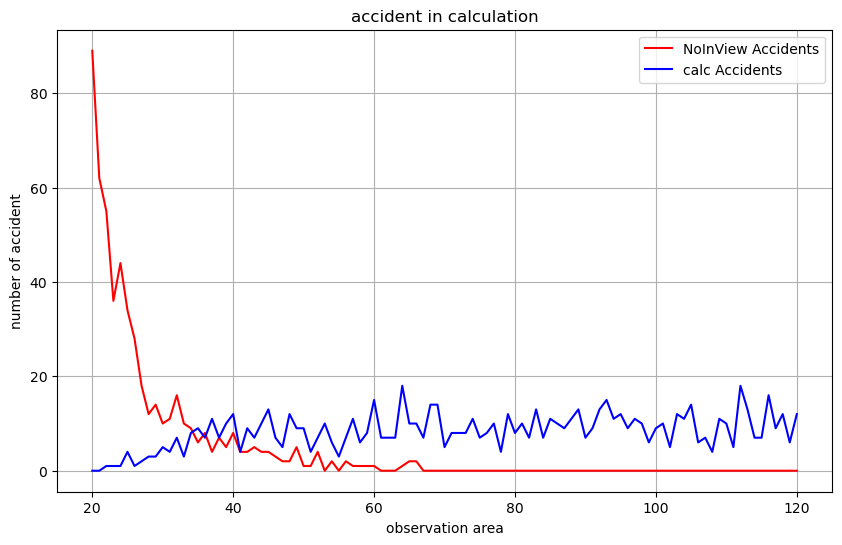

In [22]:
# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='', linestyle='-', color='r', label='NoInView Accidents')
plt.plot(x_values, y2_values, marker='', linestyle='-', color='b', label='calc Accidents')

# 设置标题和标签
plt.title('accident in calculation')
plt.xlabel('observation area')
plt.ylabel('number of accident')
plt.legend()

# 显示图表
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
import numpy as np

# 示例数据：假设你有一个 DataFrame，包含观察区域和两种事故类型的数量
data = {
    'observation_area': x_values,  # 观察区域从20到120
    'noInView_accidents': y_values,  # 第一种事故数量数据
    'inView_accidents':  y2_values # 第二种事故数量数据
}

df = pd.DataFrame(data)
df

,observation_area,noInView_accidents,inView_accidents
0,20,89,0
1,21,62,0
2,22,55,1
3,23,36,1
4,24,44,1
...,...,...,...
96,116,0,16
97,117,0,9
98,118,0,12
99,119,0,6


NoInView Accidents by Observation Area:
observation_area_bins
(20, 40]      397
(40, 60]       47
(60, 80]        5
(80, 100]       0
(100, 120]      0
Name: noInView_accidents, dtype: int64

InView Accidents by Observation Area:
observation_area_bins
(20, 40]       99
(40, 60]      162
(60, 80]      183
(80, 100]     203
(100, 120]    195
Name: inView_accidents, dtype: int64


/tmp/ipykernel_16007/3146425561.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_noInView = df.groupby('observation_area_bins')['noInView_accidents'].sum()
/tmp/ipykernel_16007/3146425561.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_inView = df.groupby('observation_area_bins')['inView_accidents'].sum()


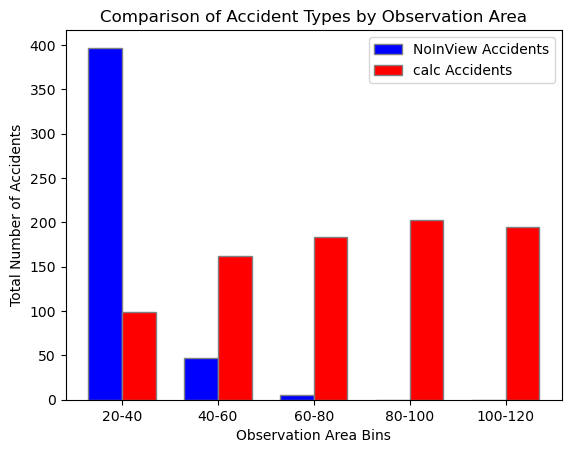

In [24]:
# 将观察区域分段
bins = [20, 40, 60, 80, 100, 120]
df['observation_area_bins'] = pd.cut(df['observation_area'], bins)

# 计算每个分段内的事故总和
grouped_noInView = df.groupby('observation_area_bins')['noInView_accidents'].sum()
grouped_inView = df.groupby('observation_area_bins')['inView_accidents'].sum()

# 输出分段后的事故总和
print("NoInView Accidents by Observation Area:")
print(grouped_noInView)
print("\nInView Accidents by Observation Area:")
print(grouped_inView)

# 可视化比较
import matplotlib.pyplot as plt

# 绘制柱状图进行比较
width = 0.35
r1 = np.arange(len(grouped_noInView))
r2 = [x + width for x in r1]

plt.bar(r1, grouped_noInView, color='b', width=width, edgecolor='grey', label='NoInView Accidents')
plt.bar(r2, grouped_inView, color='r', width=width, edgecolor='grey', label='calc Accidents')

plt.xlabel('Observation Area Bins')
plt.ylabel('Total Number of Accidents')
plt.xticks([r + width/2 for r in range(len(grouped_noInView))], ['20-40', '40-60', '60-80', '80-100', '100-120'])
plt.title('Comparison of Accident Types by Observation Area')
plt.legend()
plt.show()

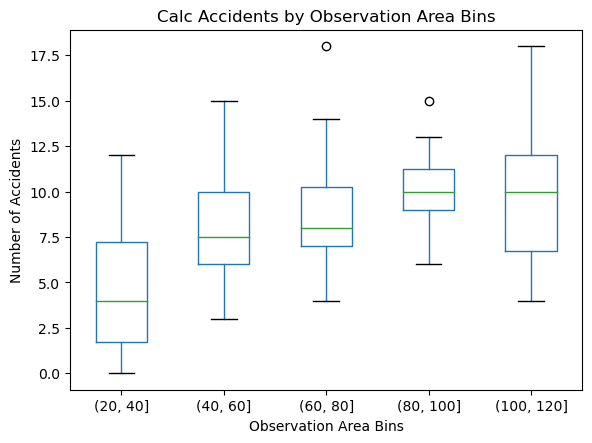

In [25]:
# # 绘制箱线图
# plt.figure(figsize=(12, 6))

# # 绘制 noInView_accidents 的箱线图
# plt.subplot(1, 2, 1)
# df.boxplot(column='noInView_accidents', by='observation_area_bins', grid=False)
# plt.title('NoInView Accidents by Observation Area Bins')
# plt.suptitle('')
# plt.xlabel('Observation Area Bins')
# plt.ylabel('Number of Accidents')

# # 绘制 inView_accidents 的箱线图
# plt.subplot(1, 2, 2)
df.boxplot(column='inView_accidents', by='observation_area_bins', grid=False)
plt.title('Calc Accidents by Observation Area Bins')
plt.suptitle('')
plt.xlabel('Observation Area Bins')
plt.ylabel('Number of Accidents')

# plt.tight_layout()
plt.show()

回归系数 (Slope): -0.6418297197250129
截距 (Intercept): 40.91115811739819
均方误差 (Mean Squared Error): 150.37916533016622
R² (Coefficient of Determination): 0.45922771797319073


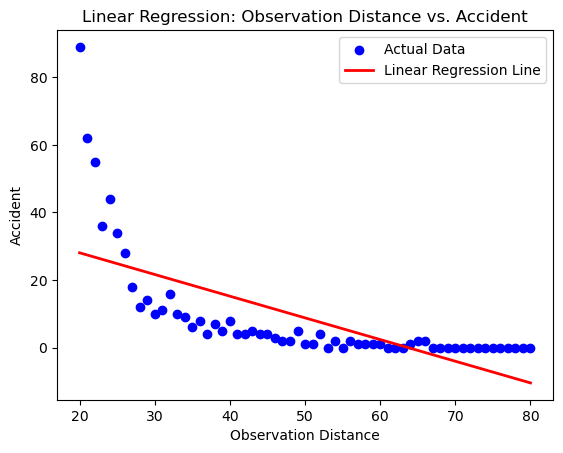

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 示例数据
# 假设你有两个列表，一个是观测距离，另一个是对应的交通事故概率
observation_distance = np.array(x_values[0:61]).reshape(-1, 1)
accident_probability = np.array(y_values[0:61])

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(observation_distance, accident_probability)

# 预测值
predicted_probabilities = model.predict(observation_distance)

# 输出回归系数
print(f"回归系数 (Slope): {model.coef_[0]}")
print(f"截距 (Intercept): {model.intercept_}")

# 计算模型性能
mse = mean_squared_error(accident_probability, predicted_probabilities)
r2 = r2_score(accident_probability, predicted_probabilities)
print(f"均方误差 (Mean Squared Error): {mse}")
print(f"R² (Coefficient of Determination): {r2}")

# 可视化回归结果
plt.scatter(observation_distance, accident_probability, color='blue', label='Actual Data')
plt.plot(observation_distance, predicted_probabilities, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Observation Distance')
plt.ylabel('Accident')
plt.title('Linear Regression: Observation Distance vs. Accident')
plt.legend()
plt.show()

R²: 0.7443
Adjusted R²: 0.7355
Mean Squared Error (MSE): 71.1076
Root Mean Squared Error (RMSE): 8.4325


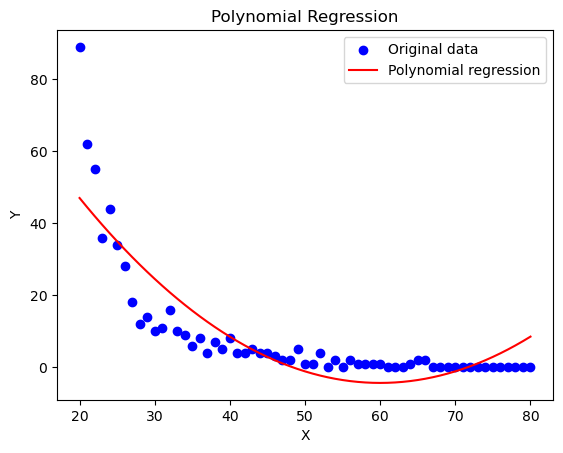

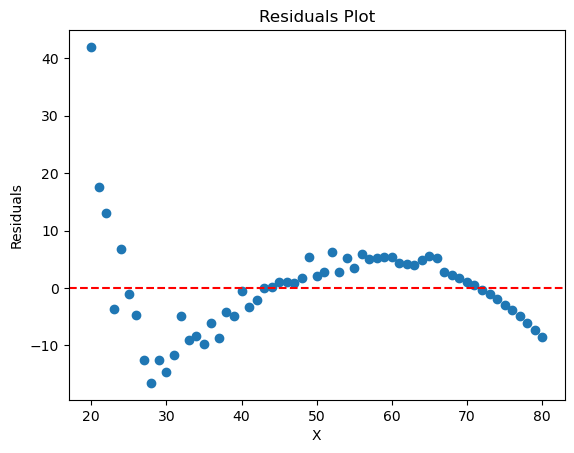

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 示例数据
x = np.array(x_values[0:61])
y = np.array(y_values[0:61])

# 将x数组转换为二维数组，因为sklearn的模型要求输入特征是二维的
x = x.reshape(-1, 1)

# 创建多项式特征，degree=2表示二次多项式
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# 创建线性回归模型并拟合多项式特征
model = LinearRegression()
model.fit(x_poly, y)

# 进行预测
y_pred = model.predict(x_poly)

# 计算评估指标
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# 调整后的R²计算
n = len(y)  # 样本数量
p = x_poly.shape[1] - 1  # 模型中的特征数量（包括多项式生成的特征）
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 输出评估结果
print(f'R²: {r2:.4f}')
print(f'Adjusted R²: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# 可视化回归曲线
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_pred, color='red', label='Polynomial regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# 残差分析
residuals = y - y_pred
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
